In [1]:
#importing libraries

import numpy as np
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot as scatter
from scipy.sparse import csr_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.model_selection import cross_val_score
#import sklearn.metrics.scorer as scorer


#reading data from file

#df,meta=pyreadstat.read_sav("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvando.sav")
df=pd.read_excel("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvandolabel.xls")

#preprocessing operations such as converting Nan values to zero,
#converting fields without value to zero,
#removing ID,fisrtname, and familyname columns from dataset

features_name=df.columns
data=np.array(df)
data=np.nan_to_num(data,0)
df=pd.DataFrame(data=data,columns=features_name)
df=df.fillna(0)
df=df.drop(['firstname','familyname','year'],axis=1)

# keep only women samples
df1=df
for l in range(2559):
    if (df1.iloc[l,0]==1.0):
        df=df.drop([l])    

true_labels=df.iloc[:,-1]
df=df.drop(['label','gender'],axis=1)
features_name=df.columns
data=np.array(df)


#performing  "VarianceThreshold" feature_selection algorithm

selector=VarianceThreshold()
data=selector.fit_transform(data)
variance1=selector.variances_
variance1_df=pd.DataFrame(data=variance1)

selector=VarianceThreshold(threshold=0.3)
data=selector.fit_transform(data)
variance2=selector.variances_
variance2_df=pd.DataFrame(data=variance2)


In [2]:
df=df.drop(['burus','ricaveri','oneMayl','Do1600','yekMayl'],axis=1)


In [3]:
df=df.drop(['Concani','barfix','jaheshJanebi','FlexibleTanehBeJeloo','RTshenidari'],axis=1)
df2=df
features_name=df.columns
data=np.array(df)

In [4]:
#performing standardScaler as preprocessing

scaler=StandardScaler(with_mean=False)
data_scaled=scaler.fit_transform(data)
df=pd.DataFrame(data=data_scaled,columns=features_name)


In [5]:

#removing correlated features

correlated_features=set()
correlation_matrix=df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.5:
            colname=correlation_matrix.columns[i]
            correlated_features.add(colname)
            
df=df.drop(labels=correlated_features,axis=1)    
features_name=df.columns

#keep 20% of dataset for test
df_train,df_test=train_test_split(df,test_size=0.2)
data=np.array(df_train)




In [7]:

#Introducing dataset to python as a sparse matrix and converting it to a Compressed Sparse Row Matrix.

sparse_data=csr_matrix(data)

#performin "TruncatedSVD"  or Non-Negative Matrix Factorization (NMF) or LatentDirichletAllocation feature extraction algorithms

#svd = TruncatedSVD(n_components=2, algorithm='arpack', random_state=42)
#data_extracted=svd.fit_transform(sparse_data)

#nmf=NMF(n_components=2, init='random', random_state=0)
#data_extracted=nmf.fit_transform(sparse_data)

lda=LatentDirichletAllocation(n_components=2, random_state=0)
data_extracted=lda.fit_transform(sparse_data)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(data)

#performing different clustering algorithms across 10FoldCrossValidation

clusterNum=4

kfold=KFold(n_splits=10, random_state=1)
silhouette_scores=[]
davies_scores=[]
k=0
for train, test in kfold.split(data_extracted):
    k=k+1
    
    
    ac=AgglomerativeClustering(n_clusters=clusterNum, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='average')
    ac=ac.fit(data_extracted[train])
    labels=ac.labels_
    
    #ms=MeanShift().fit(data_extracted[train])
    #labels=ms.labels_
    
    #kmeans=KMeans(init='random', n_clusters=clusterNum, n_init=20,precompute_distances=False, random_state=42, algorithm='full')
    #kmeans.fit(data_extracted[train])
    #labels=kmeans.labels_
    #labels_true=true_labels.iloc[train]
    
    #kmeans=MiniBatchKMeans(n_clusters=clusterNum, random_state=0, batch_size=1000)
    #kmeans.fit(data_extracted[train])
    #labels=kmeans.labels_

    #sc=SpectralClustering(n_clusters=clusterNum, assign_labels="discretize", random_state=0)
    #sc.fit(data_extracted[train])
    #labels=sc.labels_
    
    #dbscan=DBSCAN()
    #dbscan.fit(data_extracted[train])
    #labels=dbscan.labels_
    
    #birch=Birch(n_clusters=clusterNum)
    #birch.fit(data_extracted[train])
    #labels=birch.predict(data_extracted[train])
    
    #ap=AffinityPropagation().fit(data_extracted[train])
    #labels=ap.labels_
    
    
# for AgglomerativeClustering we have : linkage{“ward”, “complete”, “average”, “single”}, default=”ward”.
#Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.
#The algorithm will merge the pairs of cluster that minimize this criterion.
#ward minimizes the variance of the clusters being merged.
#average uses the average of the distances of each observation of the two sets.
#complete or maximum linkage uses the maximum distances between all observations of the two sets.
#single uses the minimum of the distances between all observations of the two sets

    
    
    
    silhouette_score=metrics.silhouette_score(data_extracted[train], labels,metric='euclidean')
    silhouette_scores.append(silhouette_score)
    
    davies_score=metrics.davies_bouldin_score(data_extracted[train], labels)
    davies_scores.append(davies_score)
    #adjustedrand_score=metrics.adjusted_rand_score(labels_true,labels)
    #homogeneityscore=metrics.homogeneity_score(labels_true,labels)
    #completenessscore=metrics.completeness_score(labels_true,labels)
    #vmeasure_score=metrics.v_measure_score(labels_true,labels)
    #adjustedmutual_info_score=metrics.adjusted_mutual_info_score(labels_true,labels)
    print('Fold: %s, silhouette_score: %.3f, davies_score:%.3f' %(k, silhouette_score, davies_score))
    #print('Fold: %s, Class dist.: %s, Acc1(silhouette): %.3f, Acc2(davies):%.3f' %(k, np.bincount(labels), silhouette_score, davies_score))
    #print(homogeneityscore,completenessscore,vmeasure_score)
print('silhouette_scores: %.3f +/- %.3f' %(np.mean(silhouette_scores), np.std(silhouette_scores)))
print('davies_scores: %.3f +/- %.3f' %(np.mean(davies_scores), np.std(davies_scores)))




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Fold: 1, silhouette_score: 0.763, davies_score:0.323
Fold: 2, silhouette_score: 0.767, davies_score:0.325
Fold: 3, silhouette_score: 0.768, davies_score:0.371
Fold: 4, silhouette_score: 0.781, davies_score:0.407


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Fold: 5, silhouette_score: 0.767, davies_score:0.331
Fold: 6, silhouette_score: 0.767, davies_score:0.312
Fold: 7, silhouette_score: 0.765, davies_score:0.327
Fold: 8, silhouette_score: 0.764, davies_score:0.399
Fold: 9, silhouette_score: 0.767, davies_score:0.315
Fold: 10, silhouette_score: 0.766, davies_score:0.368
silhouette_scores: 0.768 +/- 0.005
davies_scores: 0.348 +/- 0.034


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [8]:
#test
#Introducing test dataset to python as a sparse matrix and converting it to a Compressed Sparse Row Matrix.
data=np.array(df_test)
sparse_data=csr_matrix(data)

#performin "TruncatedSVD"  or Non-Negative Matrix Factorization (NMF) or LatentDirichletAllocation feature extraction algorithms

#svd = TruncatedSVD(n_components=2, algorithm='arpack', random_state=42)
#data_extracted=svd.fit_transform(sparse_data)

#nmf=NMF(n_components=2, init='random', random_state=0)
#data_extracted=nmf.fit_transform(sparse_data)

lda=LatentDirichletAllocation(n_components=2, random_state=0)
data_extracted=lda.fit_transform(sparse_data)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(data)

#performing  Kmeans / MiniBatchKMeans / Spectral / clustering algorithm across 10FoldCrossValidation

clusterNum=4

silhouette_scores=[]
davies_scores=[]
    
#kmeans=KMeans(init='random', n_clusters=clusterNum, n_init=20,precompute_distances=False, random_state=42, algorithm='full')
#kmeans.fit(data_extracted)
#labels=kmeans.labels_

    
#kmeans=MiniBatchKMeans(n_clusters=clusterNum, random_state=0, batch_size=1000)
#kmeans.fit(data_extracted)
#labels=kmeans.labels_

#sc=SpectralClustering(n_clusters=clusterNum, assign_labels="discretize", random_state=0)
#sc.fit(data_extracted)
#labels=sc.labels_
    
#dbscan=DBSCAN(eps=0.3)
#dbscan.fit(data_extracted)
#labels=dbscan.labels_
    
#birch=Birch(n_clusters=clusterNum)
#birch.fit(data_extracted)
#labels=birch.predict(data_extracted)
    
#ap=AffinityPropagation().fit(data_extracted)
#labels=ap.labels_
    
#ms=MeanShift().fit(data_extracted)
#labels=ms.labels_
    
    
# for AgglomerativeClustering we have : linkage{“ward”, “complete”, “average”, “single”}, default=”ward”.
#Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.
#The algorithm will merge the pairs of cluster that minimize this criterion.
#ward minimizes the variance of the clusters being merged.
#average uses the average of the distances of each observation of the two sets.
#complete or maximum linkage uses the maximum distances between all observations of the two sets.
#single uses the minimum of the distances between all observations of the two sets.

    
ac=AgglomerativeClustering(n_clusters=clusterNum, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='average')
ac=ac.fit(data_extracted)
labels=ac.labels_
    
silhouette_score=metrics.silhouette_score(data_extracted, labels,metric='euclidean')
silhouette_scores.append(silhouette_score)
    
davies_score=metrics.davies_bouldin_score(data_extracted, labels)
davies_scores.append(davies_score)
#adjustedrand_score=metrics.adjusted_rand_score(labels_true,labels)
#homogeneityscore=metrics.homogeneity_score(labels_true,labels)
#completenessscore=metrics.completeness_score(labels_true,labels)
#vmeasure_score=metrics.v_measure_score(labels_true,labels)
#adjustedmutual_info_score=metrics.adjusted_mutual_info_score(labels_true,labels)
print('silhouette_score: %.3f, davies_score:%.3f' %(silhouette_score, davies_score))
#print('Fold: %s, Class dist.: %s, Acc1(silhouette): %.3f, Acc2(davies):%.3f' %(k, np.bincount(labels), silhouette_score, davies_score))
#print(homogeneityscore,completenessscore,vmeasure_score)
print('silhouette_scores: %.3f +/- %.3f' %(np.mean(silhouette_scores), np.std(silhouette_scores)))
print('davies_scores: %.3f +/- %.3f' %(np.mean(davies_scores), np.std(davies_scores)))


silhouette_score: 0.875, davies_score:0.360
silhouette_scores: 0.875 +/- 0.000
davies_scores: 0.360 +/- 0.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


culster 0 contains 16 labels
culster 1 contains 38 labels
culster 2 contains 103 labels
culster 3 contains 17 labels


Text(0, 0.5, 'Second Component')

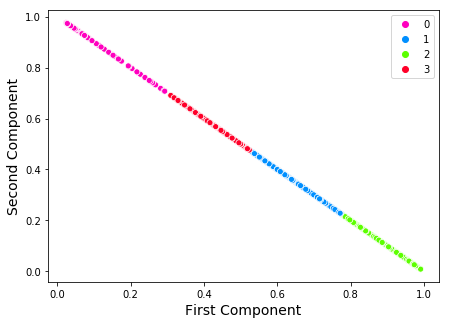

In [9]:
# plot clustering based on principle components
#sc=SpectralClustering(n_clusters=clusterNum, assign_labels="discretize", random_state=0)
#sc.fit(data_extracted)
#labels=sc.labels_

#kmeans=KMeans(init="k-means++", n_clusters=clusterNum, n_init=12, random_state=42, algorithm='full')
#kmeans.fit(data_extracted)
#labels=kmeans.labels_

data=np.array(df)
sparse_data=csr_matrix(data)

lda=LatentDirichletAllocation(n_components=2, random_state=0)
data_extracted=lda.fit_transform(sparse_data)

ac=AgglomerativeClustering(n_clusters=clusterNum, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='average')
ac=ac.fit(data_extracted)
labels=ac.labels_

#kmeans=KMeans(init='random', n_clusters=clusterNum, n_init=20,precompute_distances=False, random_state=42, algorithm='full')
#kmeans.fit(data_extracted)
#labels=kmeans.labels_

#ms=MeanShift().fit(data_extracted)
#labels=ms.labels_

labels_counter= np.array([0,0,0,0])

true_labels.reset_index(inplace=True, drop=True)

for l in range(len(data_extracted)):
    if (true_labels[l]==0.0):
        pass
    else:
        if (labels[l]==0):
            labels_counter[0]=labels_counter[0]+1
        elif (labels[l]==1):
            labels_counter[1]=labels_counter[1]+1
        elif (labels[l]==2):
            labels_counter[2]=labels_counter[2]+1
        elif (labels[l]==3):
            labels_counter[3]=labels_counter[3]+1
            
for i in range(4):
    print('culster %s contains %s labels' %(i,labels_counter[i]))
    
#dbscan=DBSCAN(eps=0.07)
#dbscan.fit(data_extracted)
#labels=dbscan.labels_

#birch=Birch(n_clusters=clusterNum)
#birch.fit(data_extracted)
#labels=birch.predict(data_extracted)

Xax=data_extracted[:,0]
Yax=data_extracted[:,1]
#ploting results
#cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)
fig,axes=plt.subplots(figsize=(7,5))
scatter(Xax,Yax,hue=labels,palette="gist_rainbow_r")
plt.xlabel("First Component",fontsize=14)
plt.ylabel("Second Component",fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


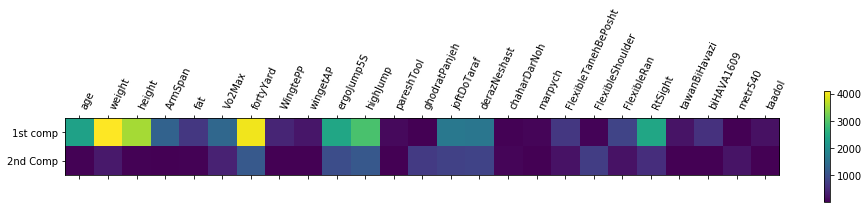

In [39]:
#plt.matshow(svd.components_,cmap='viridis')
plt.matshow(lda.components_,cmap='viridis')
#plt.matshow(nmf.components_,cmap='viridis')

plt.yticks([0,1],['1st comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features_name)),features_name,rotation=65,ha='left')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


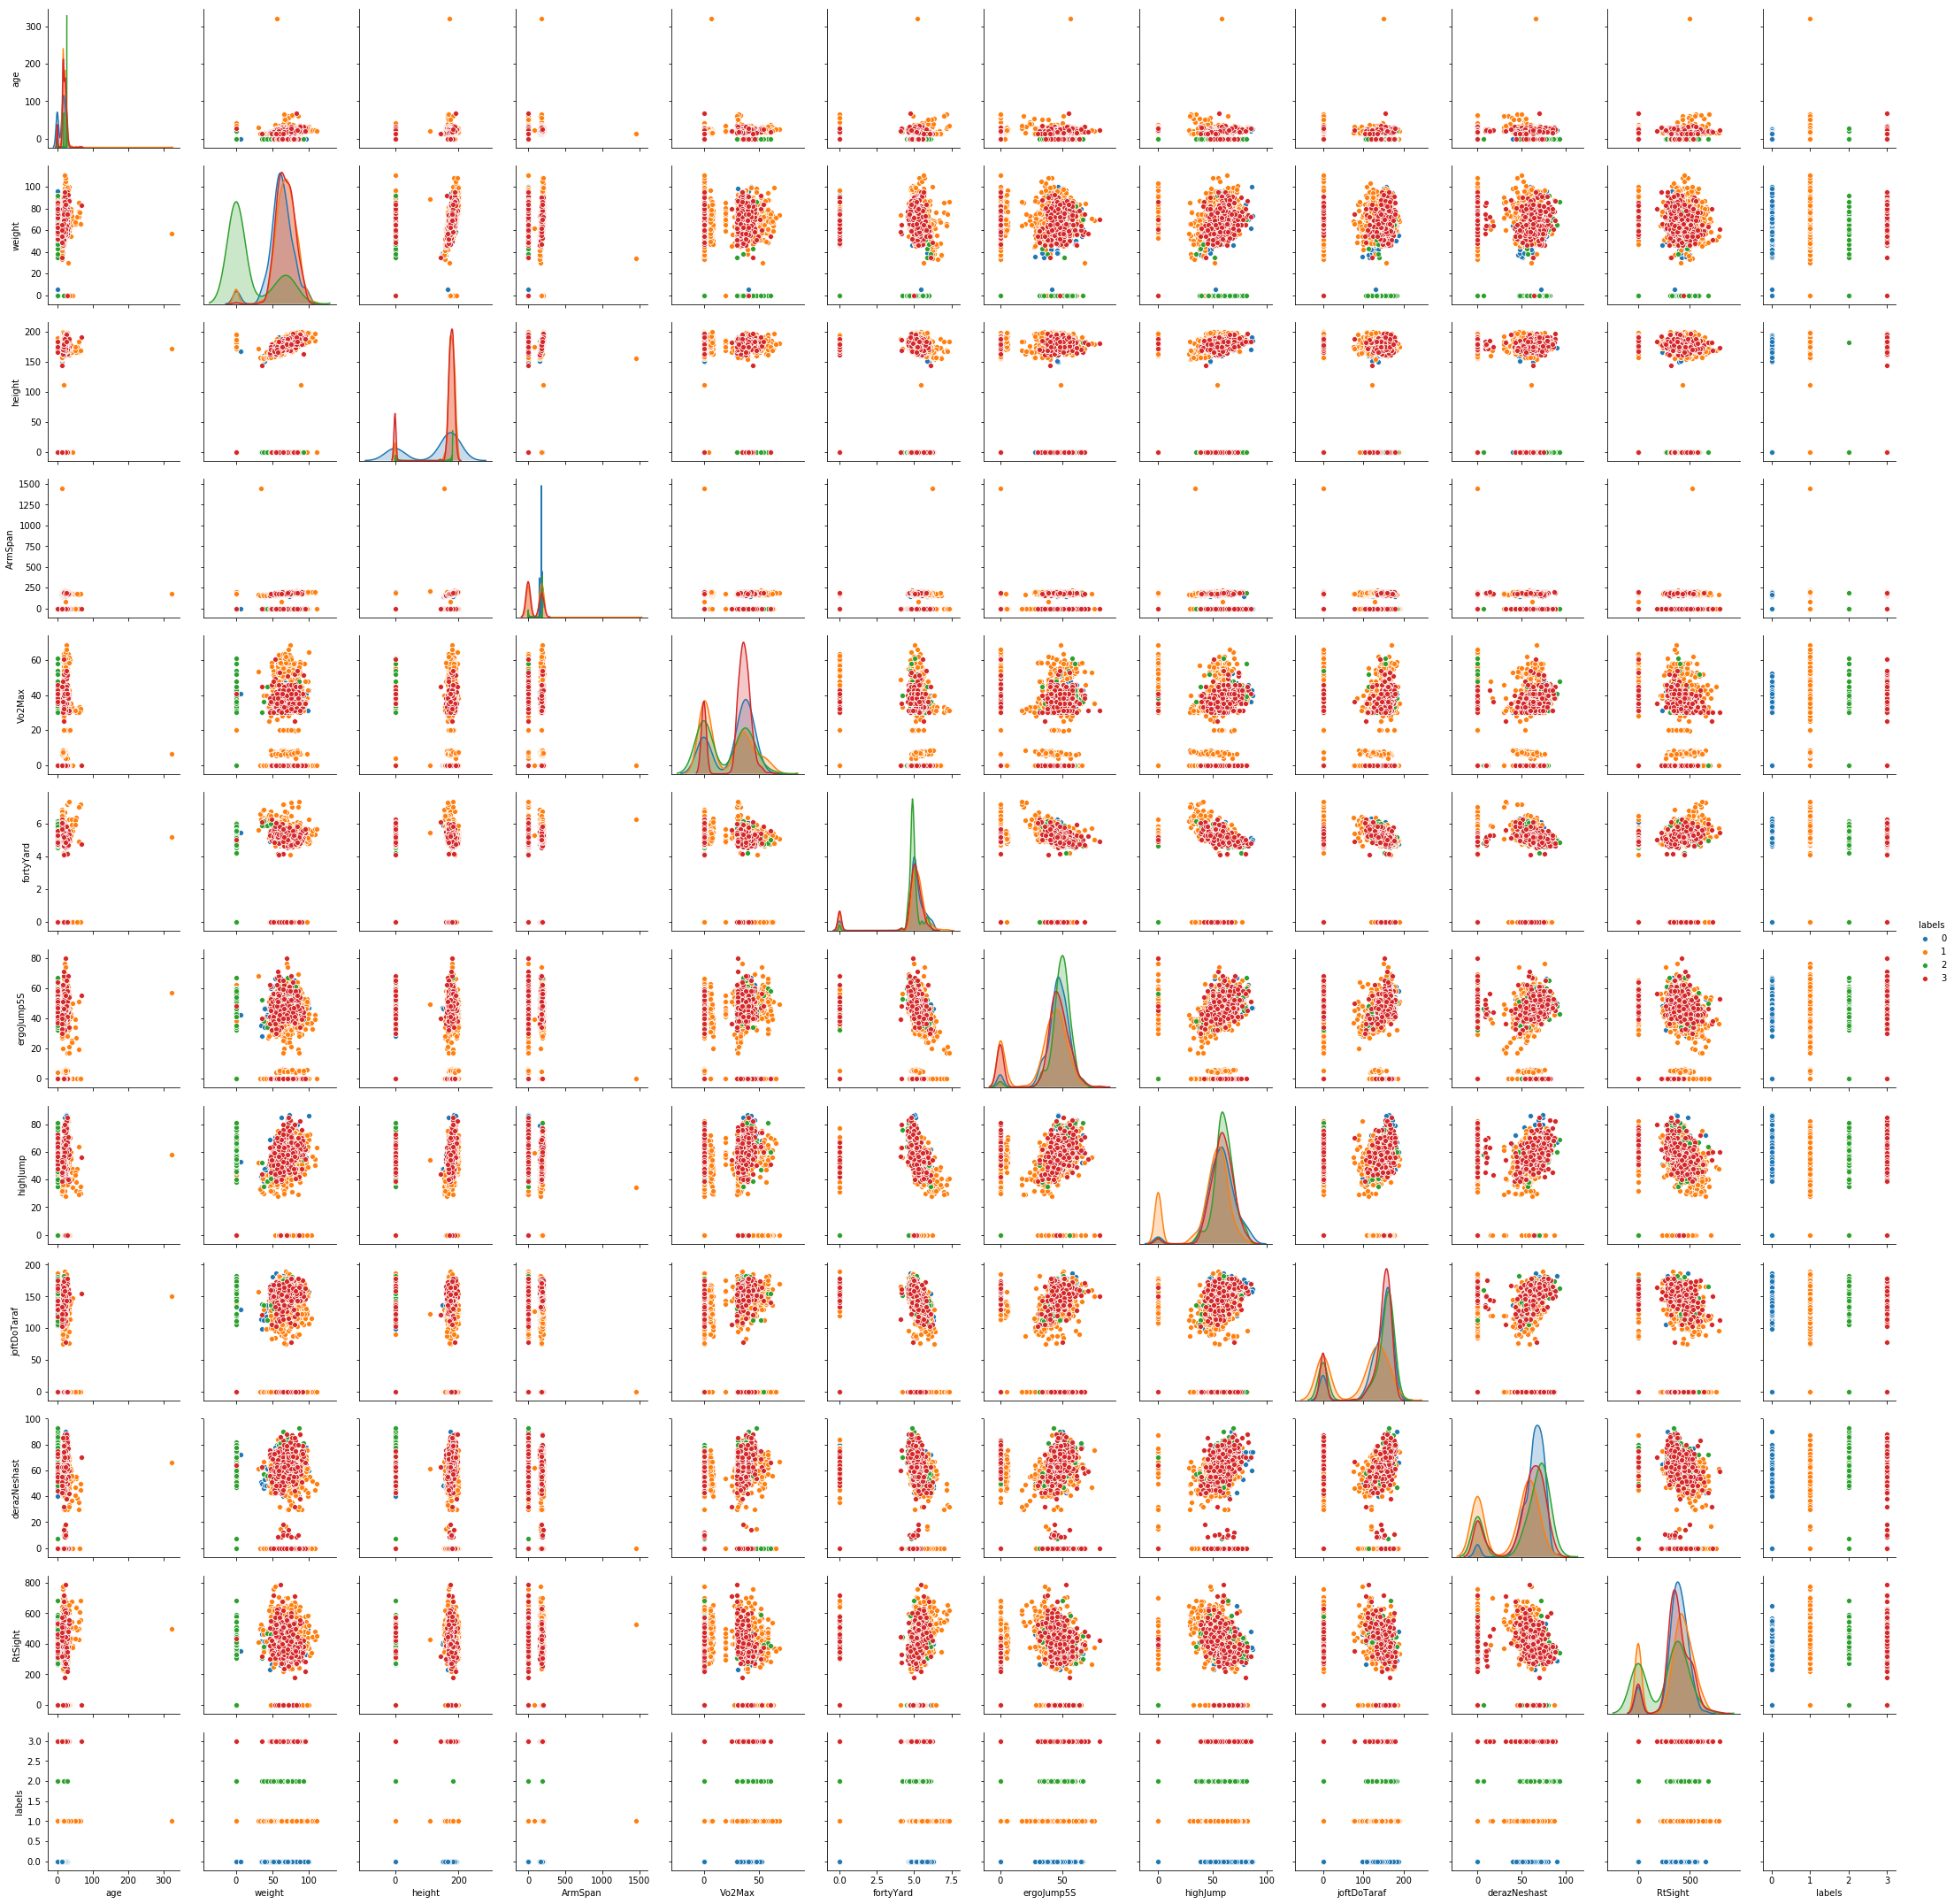

In [9]:
#plot clustering result pairwise
#labels=sc.labels_
labels1=kmeans.labels_
df2=df2.drop(['fat','WingtePP','wingetAP','pareshTool','ghodratPanjeh','chaharDarNoh','marpych','FlexibleTanehBePosht','FlexibleShoulder','FlexibleRan','tawanBiHavazi','biHAVA1609','metr540','taadol'],axis=1)
df2=df2.drop(labels=correlated_features,axis=1)
features_name=df2.columns
data=np.array(df2)
df2=pd.DataFrame(data=data,columns=features_name)
df2["labels"]=labels1
sns.pairplot(df2,hue="labels")

Text(0.5, 1.0, 'weight-fortyYard-height')

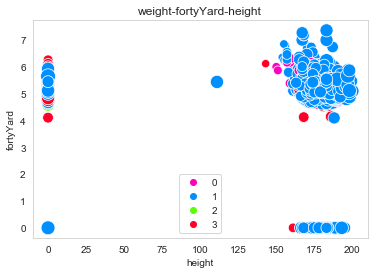

In [14]:
#plt.scatter(x=df2.iloc[:,1],y=df2.iloc[:,5],s=df2.iloc[:,6]*5,c=labels1, cmap='gist_rainbow_r', alpha=0.4,edgecolors='w')
scatter(x=df2.iloc[:,2],y=df2.iloc[:,5],s=df2.iloc[:,1]*2,hue=labels1,palette="gist_rainbow_r")
plt.xlabel('height')
plt.ylabel('fortyYard')
plt.title('weight-fortyYard-height')
